##Diabetes health indicators

### Data for part 1 :

URL: https://www.kaggle.com/datasets/abdelazizsami/cdc-diabetes-health-indicators?select=diabetes_binary_health_indicators_BRFSS2015.csv [only dataset to look into: diabetes_binary_health_indicators_BRFSS2015.csv]


#### Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix,
silhouette_score, davies_bouldin_score, normalized_mutual_info_score,
adjusted_rand_score)

`diabetes_binary_health_indicators_BRFSS2015.csv`: Contains `253,680` responses with `21` features, with the target variable `Diabetes_binary` having `2` classes: `0` (no diabetes) and `1` (prediabetes or diabetes). This dataset is not balanced.

In [ ]:
df = pd.read_csv('archive/diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

#### Correlation analysis
Top correlations with `Diabetes_binary`:

In [ ]:
corr_matrix = df.corr()
print(corr_matrix['Diabetes_binary'].sort_values(ascending=False))

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


#### Explanation:
There is weak positive correlations between `Diabetes_binary` and other `15` features, from `GenHealth` to `AnyHealthcare`. The rest of the features have weak negative correlation with `Diabetes_binary`.

Below we visualize correlations with a heatmap of all features.

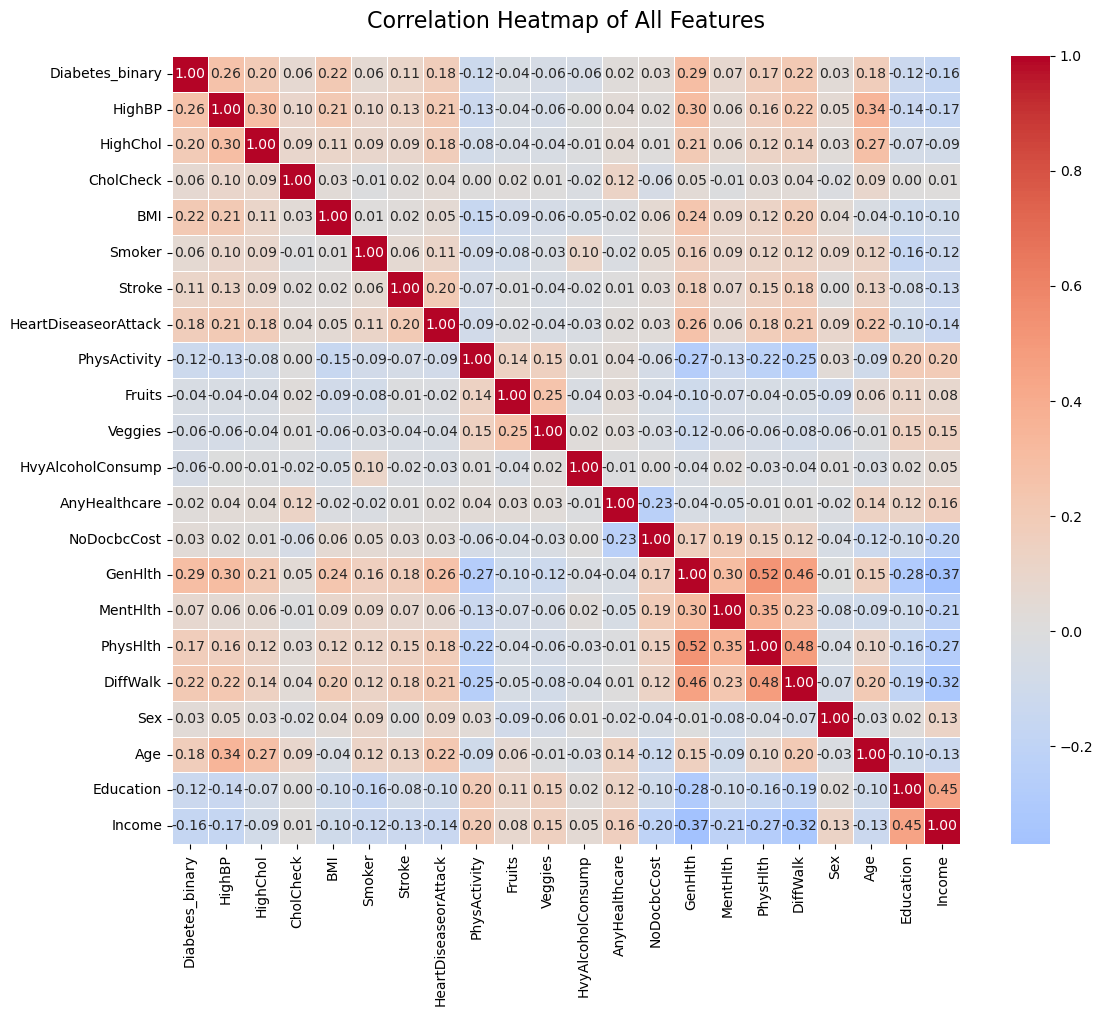

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5)
plt.title('Correlation Heatmap of All Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

#### Continuous feature groups

In [ ]:
continuous_features = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age",
                       "Education", "Income"]

#### Distribution plots for continuous features by diabetes status
We will use `seaborn` for the plot. Setting `kde` to `True` gives a smooth curve that is an estimation of the probability density function of the data; histograms represent the raw data frequency.

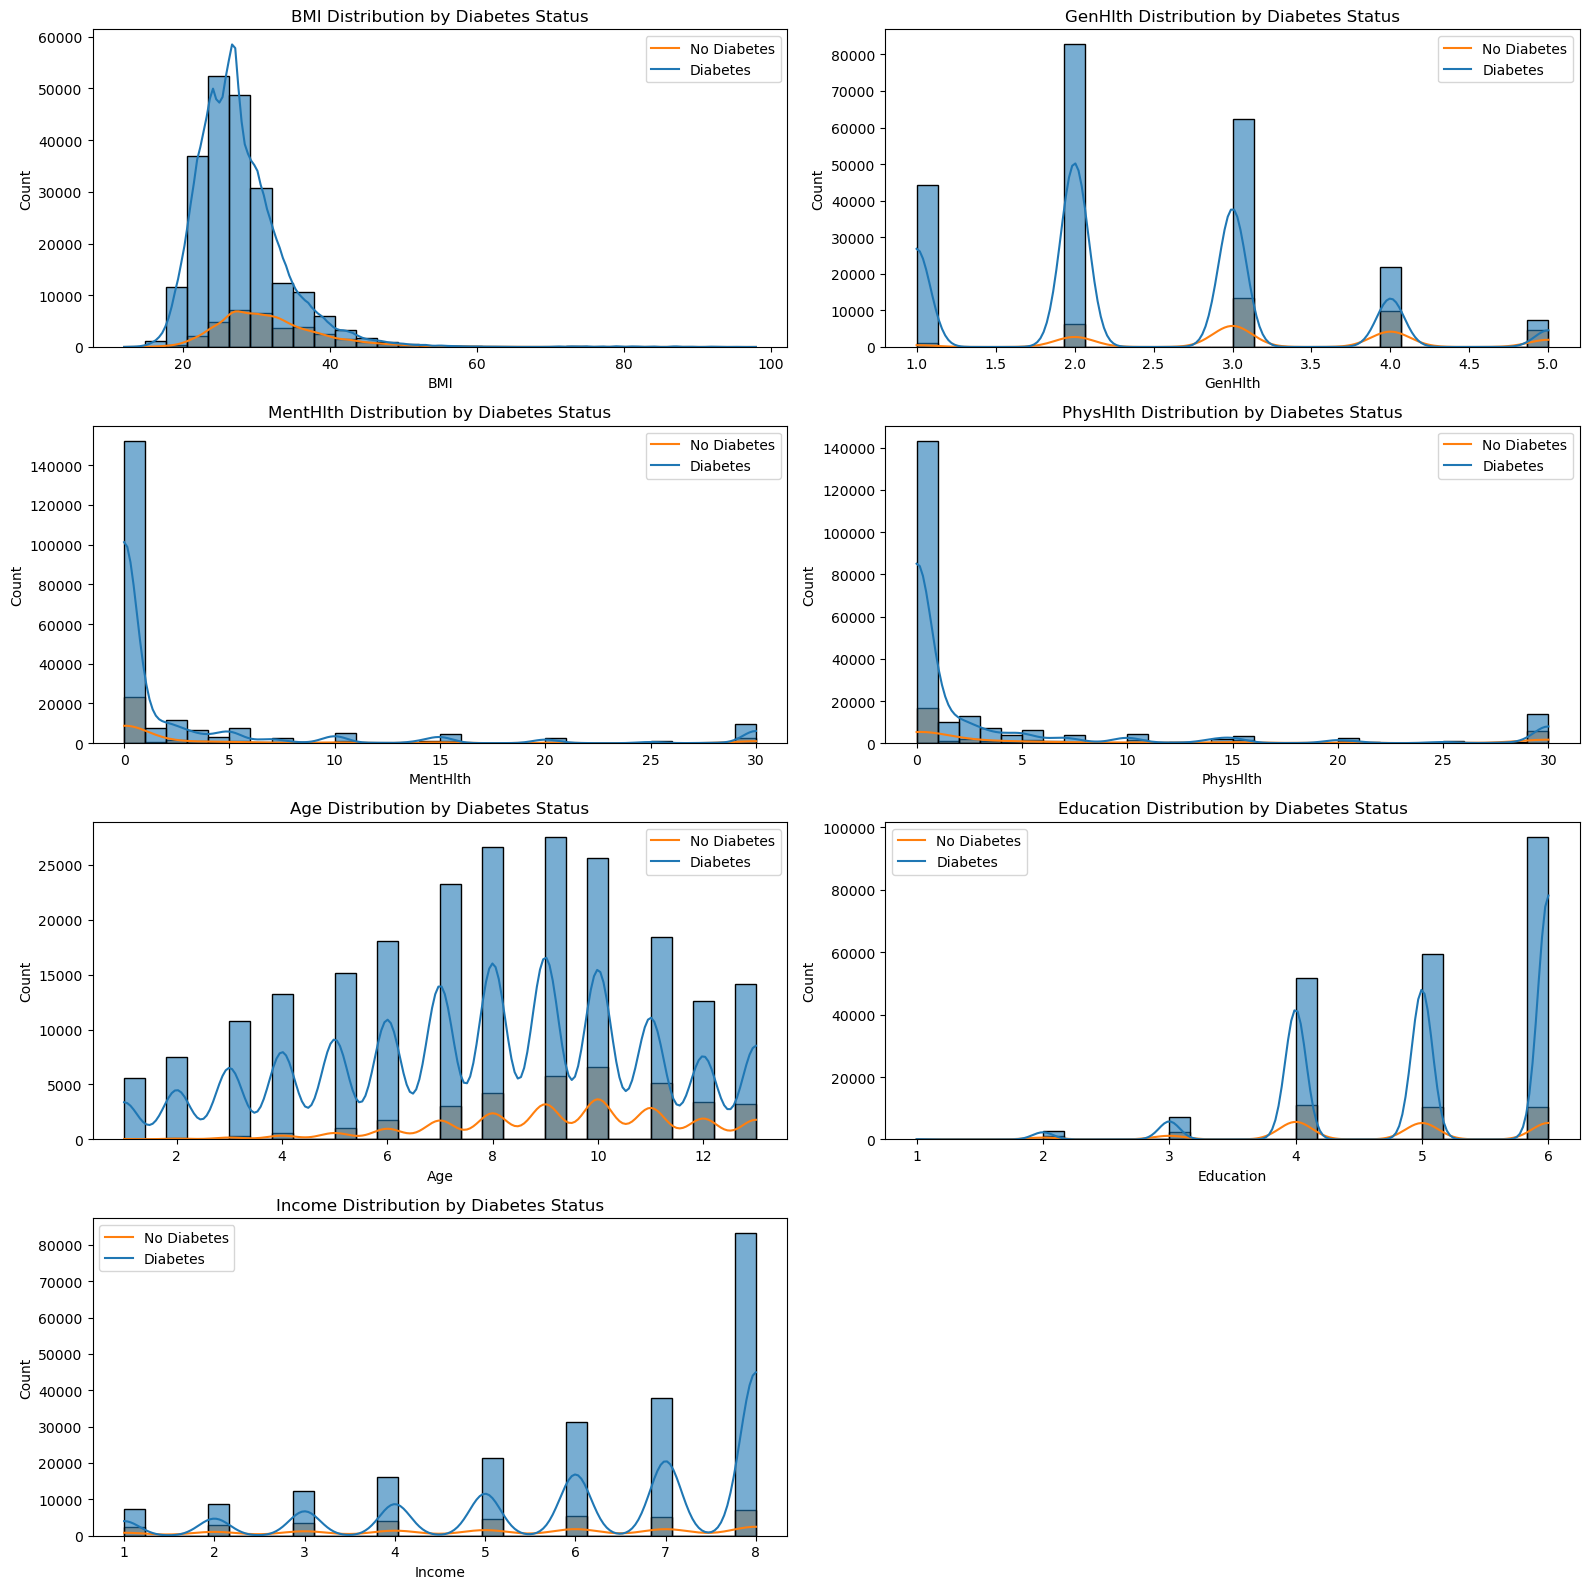

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.flatten()
for idx, feature in enumerate(continuous_features):
    sns.histplot(data=df, x=feature, hue='Diabetes_binary',
                bins=30, kde=True, ax=axes[idx], alpha=0.6)
    axes[idx].set_title(f'{feature} Distribution by Diabetes Status', fontsize=12)
    axes[idx].legend(['No Diabetes', 'Diabetes'])
axes[-1].remove()
plt.tight_layout()
plt.show()

#### Takeaways from analyzing the above plots:
 - `BMI`: The vast majority of individuals are centered around the 25-35 range, which is in fact the overweight range.
 - `GenHlth`: The majority of people are in the middle ranges, thus there are fewer people stating that their health is amazing or terrible.
 - `MentHlth`: The vast majority of people reported values at the lower ranges. There are also outliers in higher values.
 - `PhysHlth`: The distribution is as similar as of `MentHealth`.
 - `Age`: This dataset contains people of different ages but given that the middle values are the most frequent, the vast majority of respondents are adults.
 - `Education`: Highly educated pepole are the ones that abound.
 - `Income`: Similarly, people with higher levels of income abound.
 - People with diabetes and no diabetes have similar looking distributions but the count of people with diabetes is higher.

#### Distribution plots for binary features by diabetes status

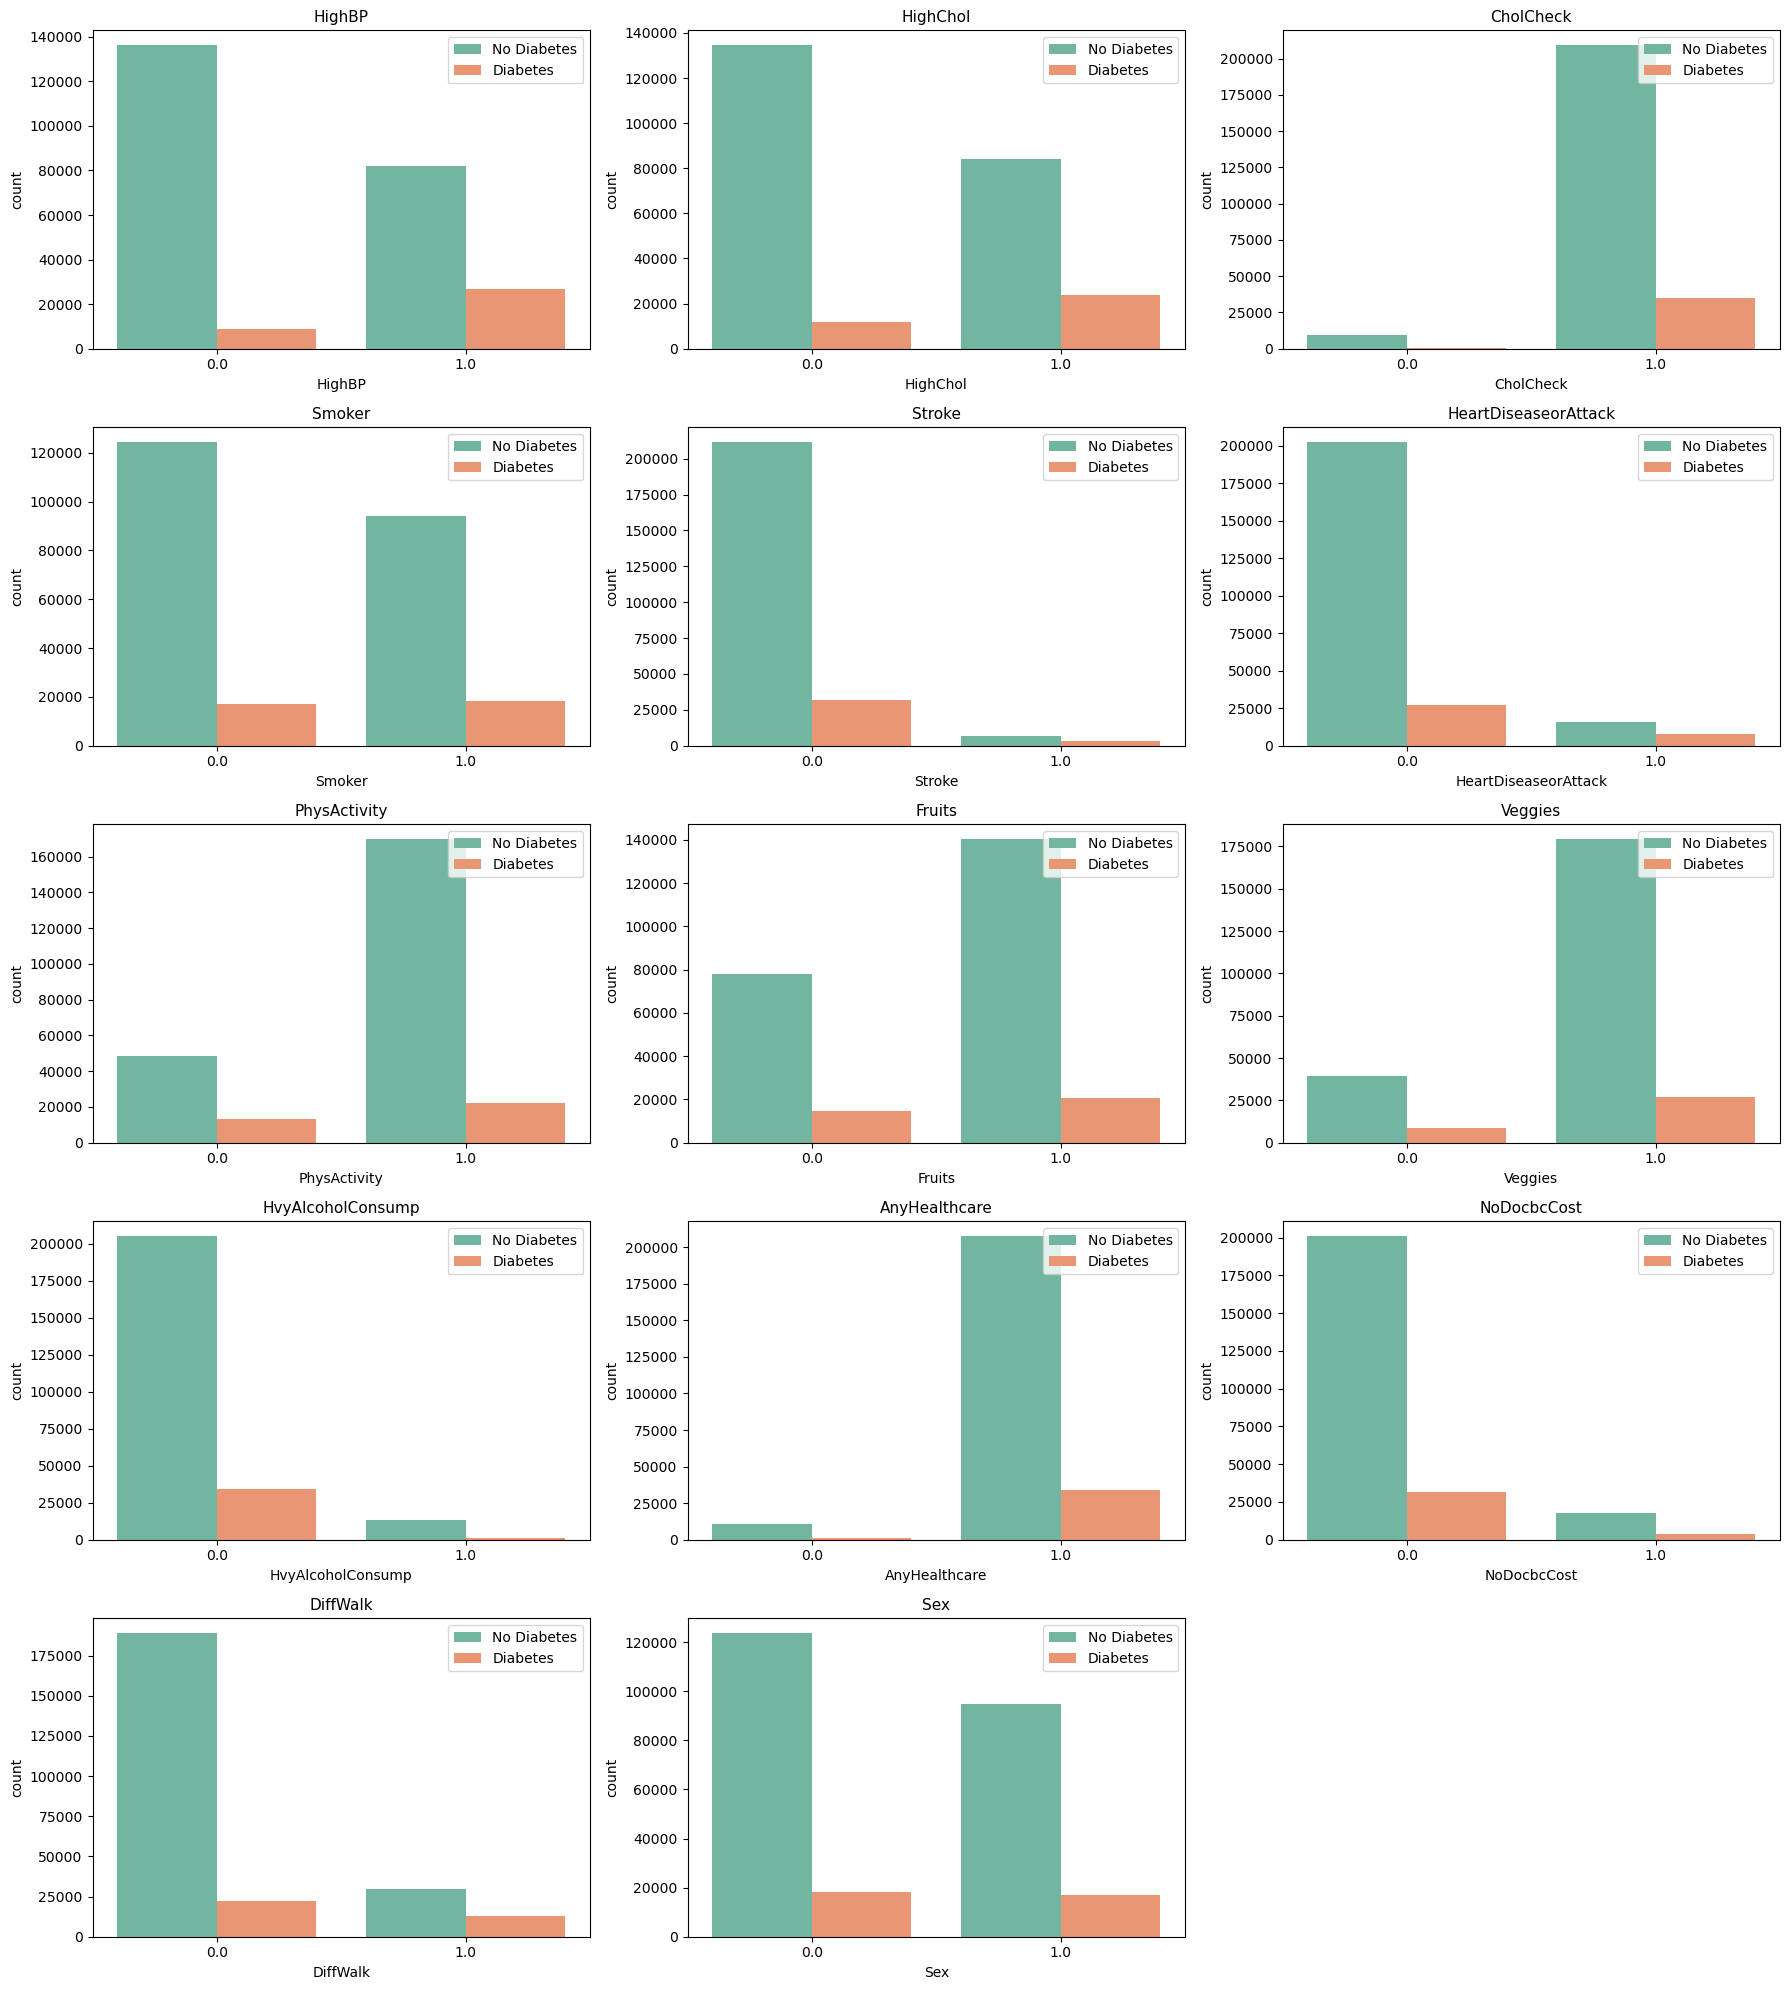

In [ ]:
binary_features = [col for col in df.columns
                   if col not in continuous_features + ['Diabetes_binary']]
fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

for idx, feature in enumerate(binary_features):
    # Create count data
    count_data = df.groupby([feature, 'Diabetes_binary']).size().reset_index(name='count')

    sns.barplot(data=count_data, x=feature, y='count',
                hue='Diabetes_binary', ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{feature}', fontsize=11)

    # Get the legend and update labels properly
    handles, labels = axes[idx].get_legend_handles_labels()
    axes[idx].legend(handles, ['No Diabetes', 'Diabetes'], loc='upper right')

axes[-1].remove()
plt.tight_layout()
plt.show()

#### Takeaways from analyzing the above plots:

- The X-axis represents feature values:  0 = Feature is absent, 1 = Feature is present
- Y-axis represents no. of people.
- Colors represent if people had diabetes or not.
- From the plots we can see that absence of (i.e. 0) negative features such as `HvyAlcoholConsump` indicates more people with "No Diabetes" than with "Diabetes". On the other hand, presence of (i.e. 1) positive features such as `AnyHealthcare` indicates more people with "No Diabetes" than with "Diabetes".
- Across all plots "No Diabetes" count is higher.
- `HighBP`: Note that in the diabetes group there is a high blood pressure prevalence.
- `HighCholesterol`: Having high cholesterol is in fact more prevalent.

#### Class distribution in Diabetes
The dataset is imblanced with people with on diabetes being over six times higher.

In [ ]:
print(df['Diabetes_binary'].value_counts())
df['Diabetes_binary'].value_counts()[0] / df['Diabetes_binary'].value_counts()[1]

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64


6.177049736886777

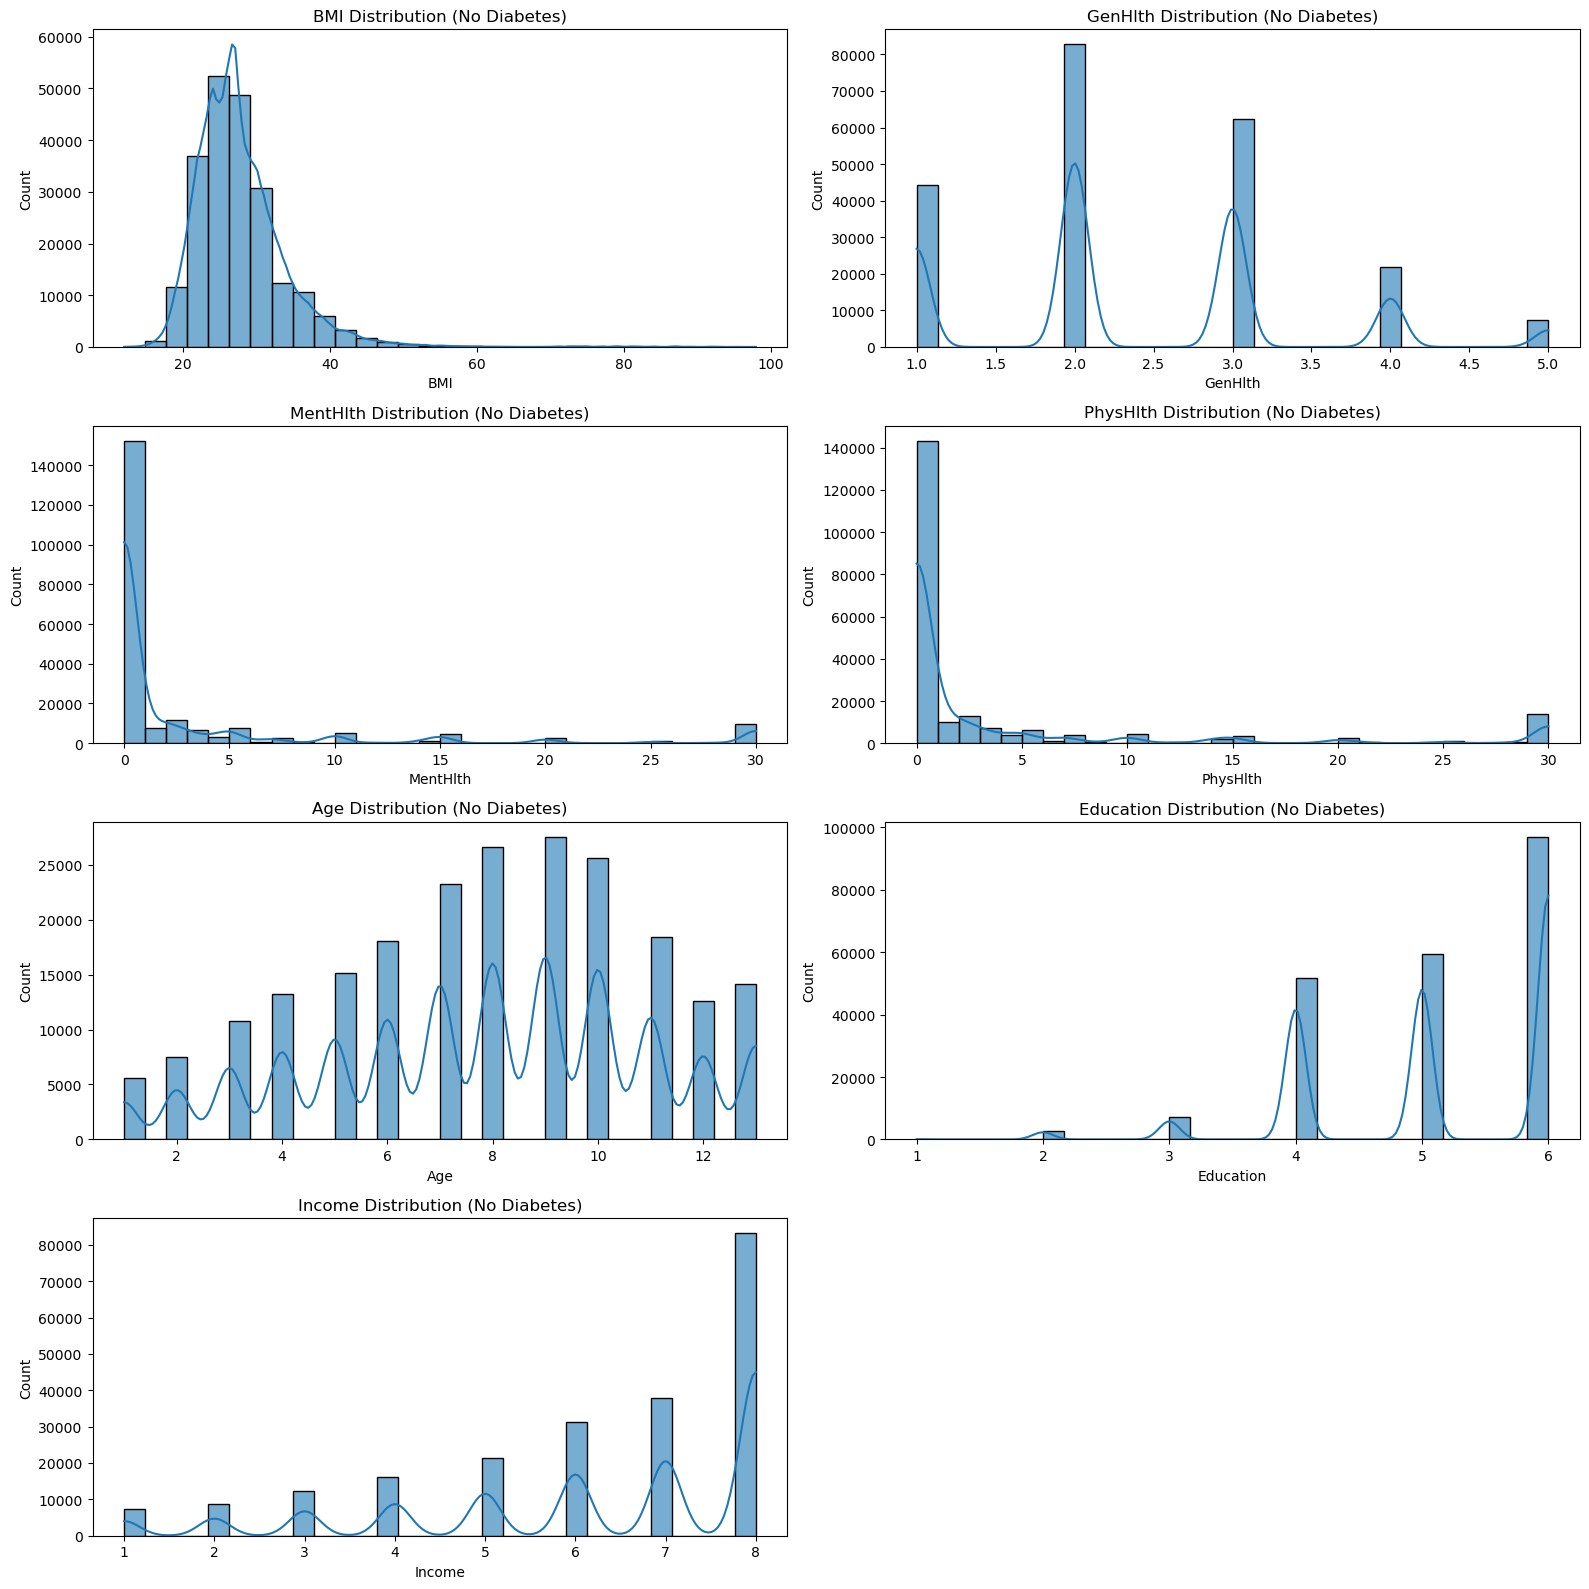

In [ ]:
# Filter for no diabetes only
df_no_diabetes = df[df['Diabetes_binary'] == 0]

fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.flatten()

for idx, feature in enumerate(continuous_features):
    sns.histplot(data=df_no_diabetes, x=feature,
                bins=30, kde=True, ax=axes[idx], alpha=0.6)
    axes[idx].set_title(f'{feature} Distribution (No Diabetes)', fontsize=12)
    axes[idx].set_ylabel('Count')
    axes[idx].set_xlabel(feature)

axes[-1].remove()
plt.tight_layout()
plt.show()

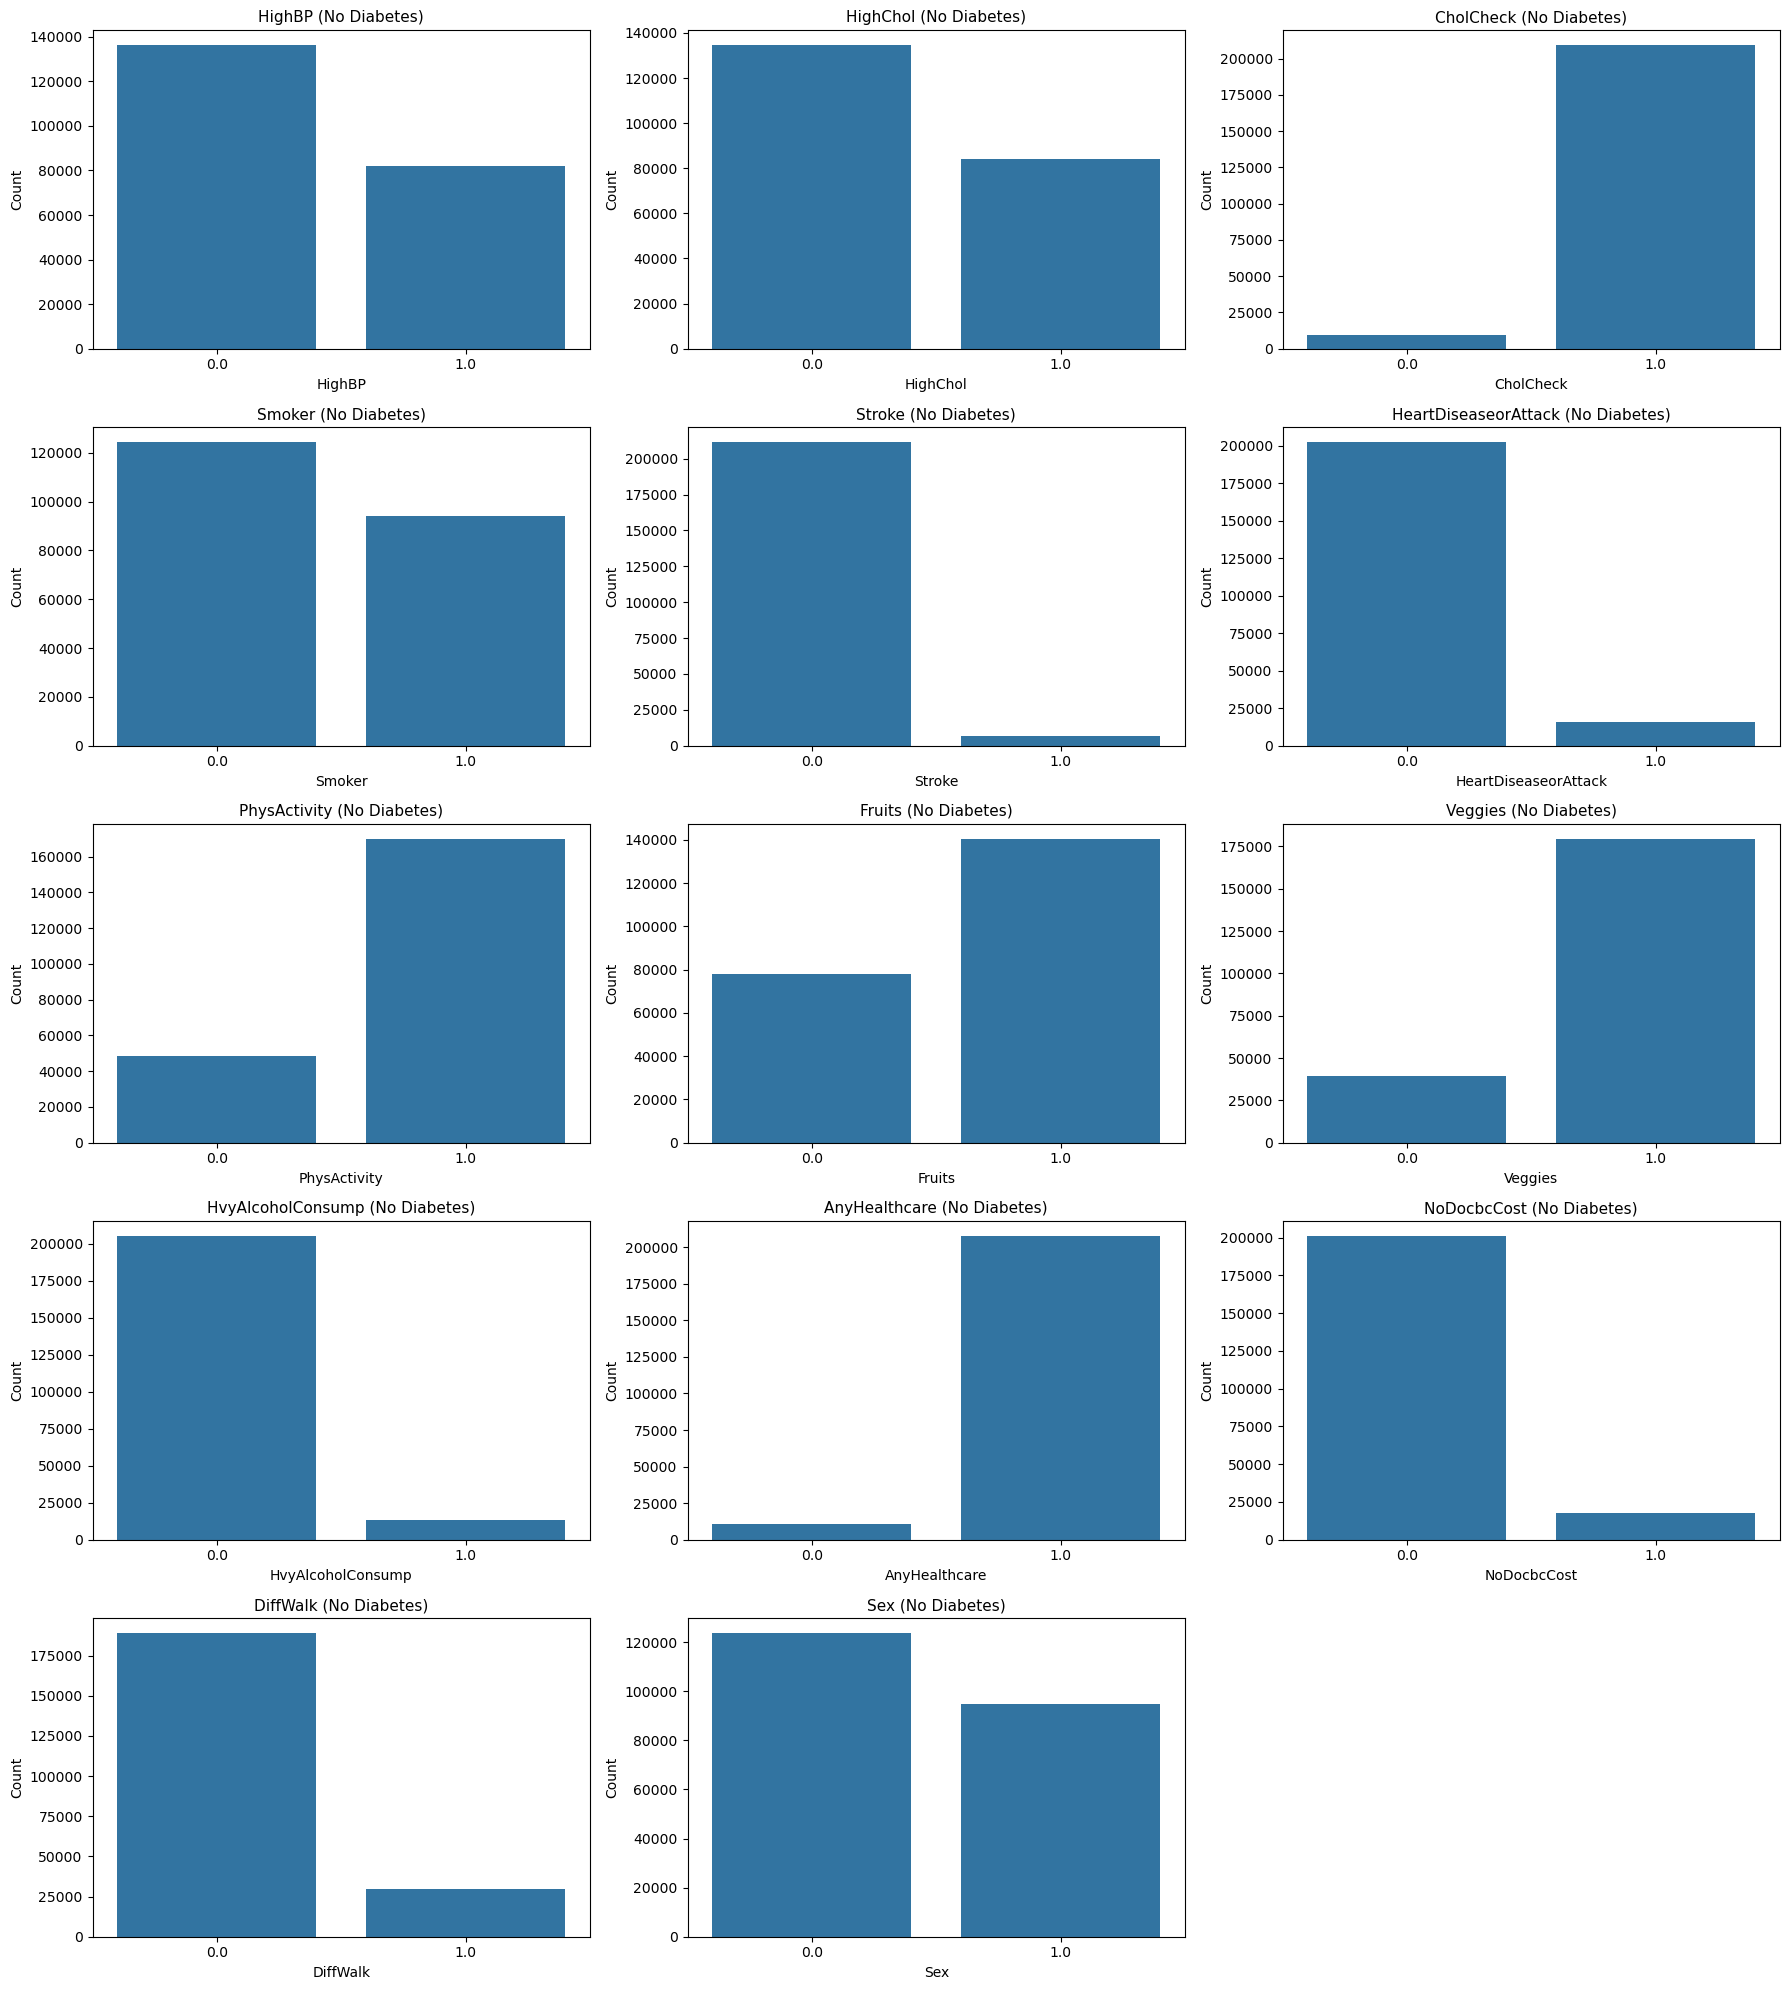

In [ ]:
binary_features = [col for col in df.columns
                   if col not in continuous_features + ['Diabetes_binary']]
fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

for idx, feature in enumerate(binary_features):
    count_data = df_no_diabetes[feature].value_counts().reset_index()
    count_data.columns = [feature, 'count']

    sns.barplot(data=count_data, x=feature, y='count',
                ax=axes[idx])
    axes[idx].set_title(f'{feature} (No Diabetes)', fontsize=11)
    axes[idx].set_ylabel('Count')

axes[-1].remove()
plt.tight_layout()
plt.show()

#### Takeaway:
Given that the dataset is imbalanced (more values with `diabetes_binary == 0`), there isnt much change when comparing the whole dataset's features to just `diabetes_binary == 0`

#### PCA Analysis
We will split the data applying `stratify` to match indices with the samples that we visualize later.

In [ ]:
# Split the data
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Use sample for visualization
sample_size = 2000
X_train_sample = X_train.sample(n=sample_size, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index] # Match indices

In [ ]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sample)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

#### Visualize first two principal components

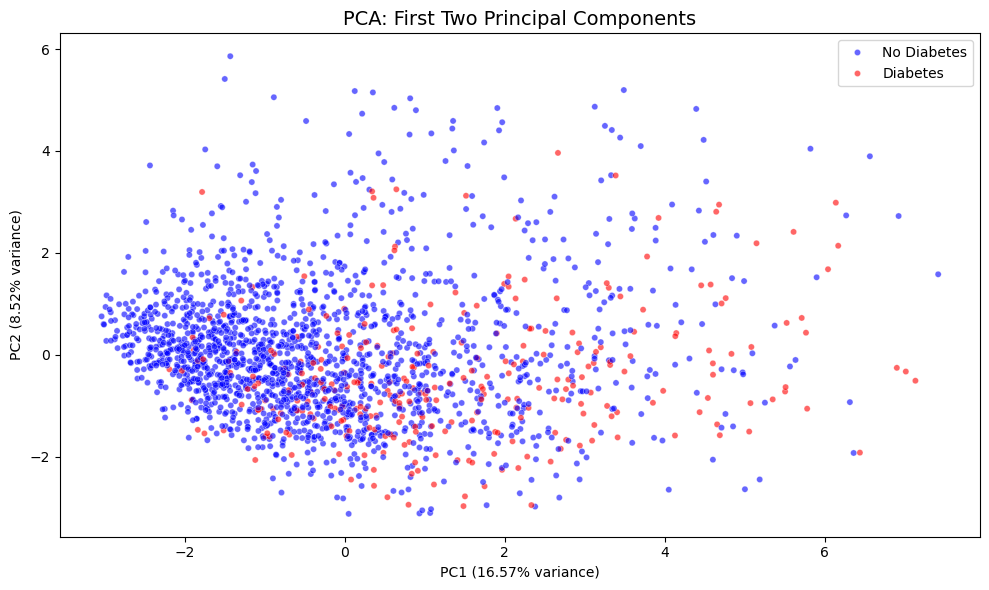

In [ ]:
pca_df = pd.DataFrame(
    data=X_train_pca[:, :2],
    columns=['PC1', 'PC2']
)
pca_df['Diabetes'] = y_train_sample.values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Diabetes',
                alpha=0.6, palette={0.0: 'blue', 1.0: 'red'}, s=20)
plt.title('PCA: First Two Principal Components', fontsize=14)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

#### Takeaway:
- Heavy overlap between classes indicates that the first two principal components don't cleanly separate diabetic from non-diabetic individuals.
- PC1 explains `16.57%` of variance in diabetes and PC2 explains `8.52%`. We will plot individual explained variance and cumulative explained variance below.

#### Variance Analysis
Individual explained variance and cumulative explained variance.

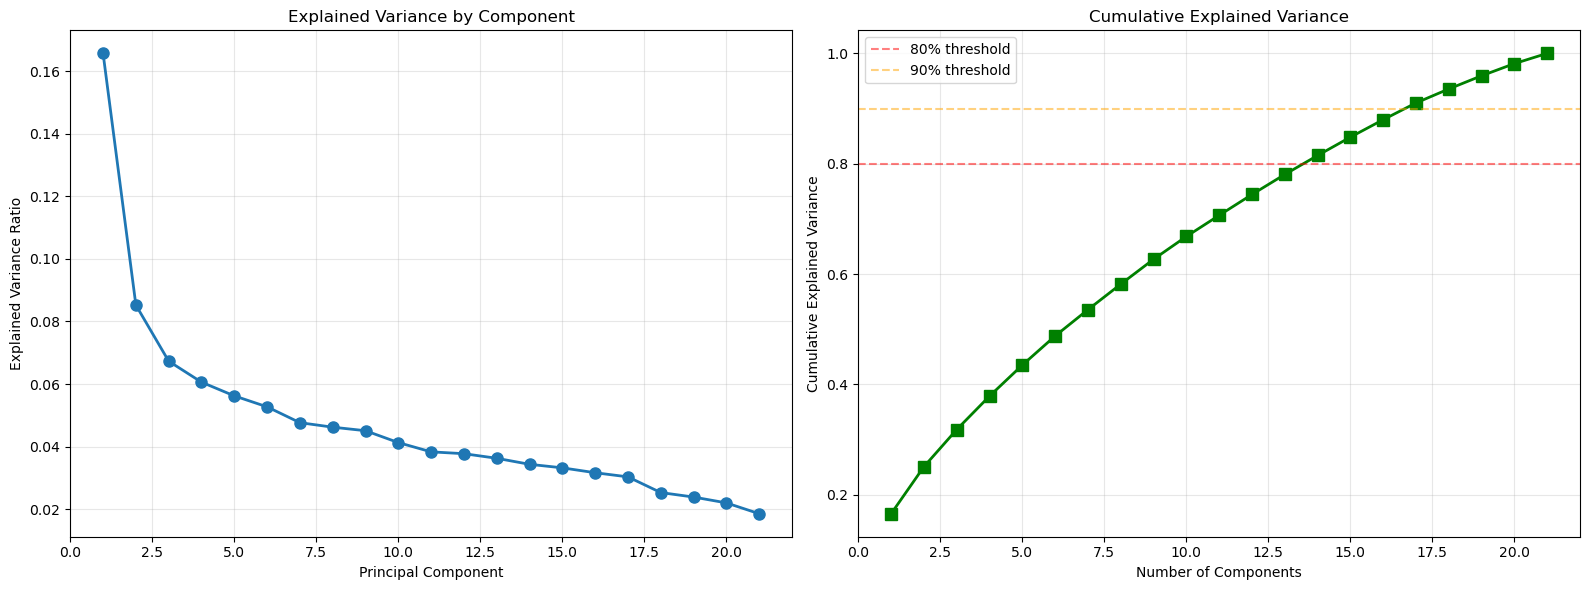

In [ ]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Individual variance
ax1.plot(range(1, len(explained_variance) + 1), explained_variance,
         marker='o', linewidth=2, markersize=8)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance by Component')
ax1.grid(True, alpha=0.3)

# Cumulative variance
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
         marker='s', linewidth=2, markersize=8, color='green')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.axhline(y=0.8, color='r', linestyle='--', alpha=0.5, label='80% threshold')
ax2.axhline(y=0.9, color='orange', linestyle='--', alpha=0.5, label='90% threshold')
ax2.grid(True, alpha=0.3)
ax2.legend()
plt.tight_layout()
plt.show()

#### Discussion:

Based on our analysis, **12** would be a good threshold for the number of principle components.
This reduces the components from `21` to `12` and still maintain `80%` of variance. The **Cumulative Explained Variance** plot tells us that we can capture about 80% of variance if we used 12-13 components. So, we can take 12 components for good dimensionality reduction while retaining most information. The **Explained Variance by Component** plot tells us that the individual variance gradually decreases for higher principle components.

In [ ]:
PC1 = X_train_pca[:, 0]
PC2 = X_train_pca[:, 1]

#### K-MEANS TUNING

In [ ]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_pca, kmeans.labels_))

for k, inertia, sil in zip(k_range, inertias, silhouette_scores):
    print(f"k={k}: Inertia={inertia:.0f}, Silhouette={sil:.4f}")

k=2: Inertia=37334, Silhouette=0.2062
k=3: Inertia=35228, Silhouette=0.0804
k=4: Inertia=33249, Silhouette=0.0855
k=5: Inertia=31731, Silhouette=0.0890
k=6: Inertia=30401, Silhouette=0.1060
k=7: Inertia=29315, Silhouette=0.0949
k=8: Inertia=27951, Silhouette=0.1066
k=9: Inertia=27060, Silhouette=0.0785
k=10: Inertia=26657, Silhouette=0.0797


Selecting `k=2` will make the clustering too simplistic. Inertia is still high at `k=3`, so have 3 clusters can be more interpretable. We could also choose `k=6` because silhouttee score is more there, but having 6 clusters might be hard to interpret.

In [ ]:
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(X_train_pca)
print(f"Selected k={optimal_k}, Silhouette: {silhouette_score(X_train_pca, kmeans_labels):.4f}")

Selected k=3, Silhouette: 0.0804


#### DBSCAN TUNING

In [ ]:
eps_values = [0.5, 1.0, 1.5, 2.0, 3.0]
min_samples_values = [5, 10, 20]
dbscan_results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_train_pca)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters >= 2 and n_noise < len(labels):
            sil_score = silhouette_score(X_train_pca, labels)
        else:
            sil_score = -1

        dbscan_results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_pct': n_noise/len(labels)*100,
            'silhouette': sil_score
        })

dbscan_df = pd.DataFrame(dbscan_results)
dbscan_df

eps  min_samples  n_clusters  n_noise  noise_pct  silhouette
0   0.5            5           2     1987      99.35   -0.206981
1   0.5           10           0     2000     100.00   -1.000000
2   0.5           20           0     2000     100.00   -1.000000
3   1.0            5          10     1838      91.90   -0.243513
4   1.0           10           2     1933      96.65   -0.190310
5   1.0           20           1     1980      99.00   -1.000000
6   1.5            5          24     1470      73.50   -0.155376
7   1.5           10          13     1622      81.10   -0.179365
8   1.5           20           3     1837      91.85   -0.182151
9   2.0            5          34     1260      63.00   -0.106484
10  2.0           10          21     1380      69.00   -0.129343
11  2.0           20           8     1631      81.55   -0.167284
12  3.0            5           9      533      26.65    0.059971
13  3.0           10           6      691      34.55    0.044165
14  3.0           20           1      889      44.45   -1.000000

The silhoutte score is heighest (`0.059971`) for `eps=3.0`, and it gives 9 clusters. We chose `k=3` in the K-Means tuning, but here having `k=9` suggests that DBSCAN sees more granular structure. We can also select `k=6`, for which silhouette is the second best (`0.044165`) and `eps=3.0`, to maintain balance between clustering quality and interpretability; the `min_samples` is `10`.

In [ ]:
selected_eps = 3
selected_min_samples = 10
dbscan_final = DBSCAN(eps=selected_eps, min_samples=selected_min_samples)
dbscan_labels = dbscan_final.fit_predict(X_train_pca)
print(f"\nSelected: eps={selected_eps}, min_samples={selected_min_samples}")
print(f"Clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}, "
      f"Noise: {list(dbscan_labels).count(-1)} ({list(dbscan_labels).count(-1)/len(dbscan_labels)*100:.1f}%)")


Selected: eps=3, min_samples=10
Clusters: 6, Noise: 691 (34.5%)


#### AGGLOMERATIVE CLUSTERING TUNING

In [ ]:
agg_silhouette_scores = []
agg_k_range = range(2, 11)

for k in agg_k_range:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X_train_pca)
    agg_silhouette_scores.append(silhouette_score(X_train_pca, labels))

for k, sil in zip(agg_k_range, agg_silhouette_scores):
    print(f"k={k}: Silhouette={sil:.4f}")

k=2: Silhouette=0.1506
k=3: Silhouette=0.1501
k=4: Silhouette=0.1558
k=5: Silhouette=0.1696
k=6: Silhouette=0.1726
k=7: Silhouette=0.1697
k=8: Silhouette=0.1783
k=9: Silhouette=0.1185
k=10: Silhouette=0.1244


While `k=8` achieves the highest silhouette score (`0.1783`), we select `k=3` for consistency and interpretability. Silhouette fo `0.1501` still good considering the difference of 5 clusters between 8 and 3.

In [ ]:
optimal_agg_k = 3
agg_final = AgglomerativeClustering(n_clusters=optimal_agg_k)
agg_labels = agg_final.fit_predict(X_train_pca)
print(f"\nSelected k={optimal_agg_k}, Silhouette: {silhouette_score(X_train_pca, agg_labels):.4f}")


Selected k=3, Silhouette: 0.1501


#### GAUSSIAN MIXTURE MODEL TUNING

In [ ]:
gmm_bic_scores = []
gmm_aic_scores = []
gmm_silhouette_scores = []
gmm_k_range = range(2, 11)

for k in gmm_k_range:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_train_pca)
    gmm_bic_scores.append(gmm.bic(X_train_pca))
    gmm_aic_scores.append(gmm.aic(X_train_pca))
    labels = gmm.fit_predict(X_train_pca)
    gmm_silhouette_scores.append(silhouette_score(X_train_pca, labels))

for k, bic, aic, sil in zip(gmm_k_range, gmm_bic_scores, gmm_aic_scores, gmm_silhouette_scores):
    print(f"k={k}: BIC={bic:.0f}, AIC={aic:.0f}, Silhouette={sil:.4f}")

k=2: BIC=55161, AIC=52333, Silhouette=0.1710
k=3: BIC=33034, AIC=28789, Silhouette=0.0787
k=4: BIC=15146, AIC=9483, Silhouette=0.1904
k=5: BIC=2394, AIC=-4685, Silhouette=0.0766
k=6: BIC=-16287, AIC=-24784, Silhouette=0.0672
k=7: BIC=-24692, AIC=-34606, Silhouette=0.0871
k=8: BIC=-24738, AIC=-36069, Silhouette=0.0615
k=9: BIC=-33961, AIC=-46709, Silhouette=0.0614
k=10: BIC=-44290, AIC=-58454, Silhouette=0.0607


We observe `BIC` scores to determine `k` here. Lower `BIC` is better, and `BIC` already penalizes complexity. However, we will go with `k=6` because `BIC` drops comparatevely less from `k=6` to `k=8`, and taking `k=6` should be more interpretable and comparable to DBSCAN where we also consider 6 clusters.

So, we chose `k=3` for 2 models and `k=6` for other 2 models.

In [ ]:
optimal_gmm_k = 6
gmm_final = GaussianMixture(n_components=optimal_gmm_k, covariance_type='full', random_state=42)
gmm_labels = gmm_final.fit_predict(X_train_pca)
print(f"\nSelected k={optimal_gmm_k} (based on BIC), Silhouette: {silhouette_score(X_train_pca, gmm_labels):.4f}")


Selected k=6 (based on BIC), Silhouette: 0.0672


#### Visual comparison of  K-Means, DBSCAN, Agglomerative clustering, Gaussian Mixture

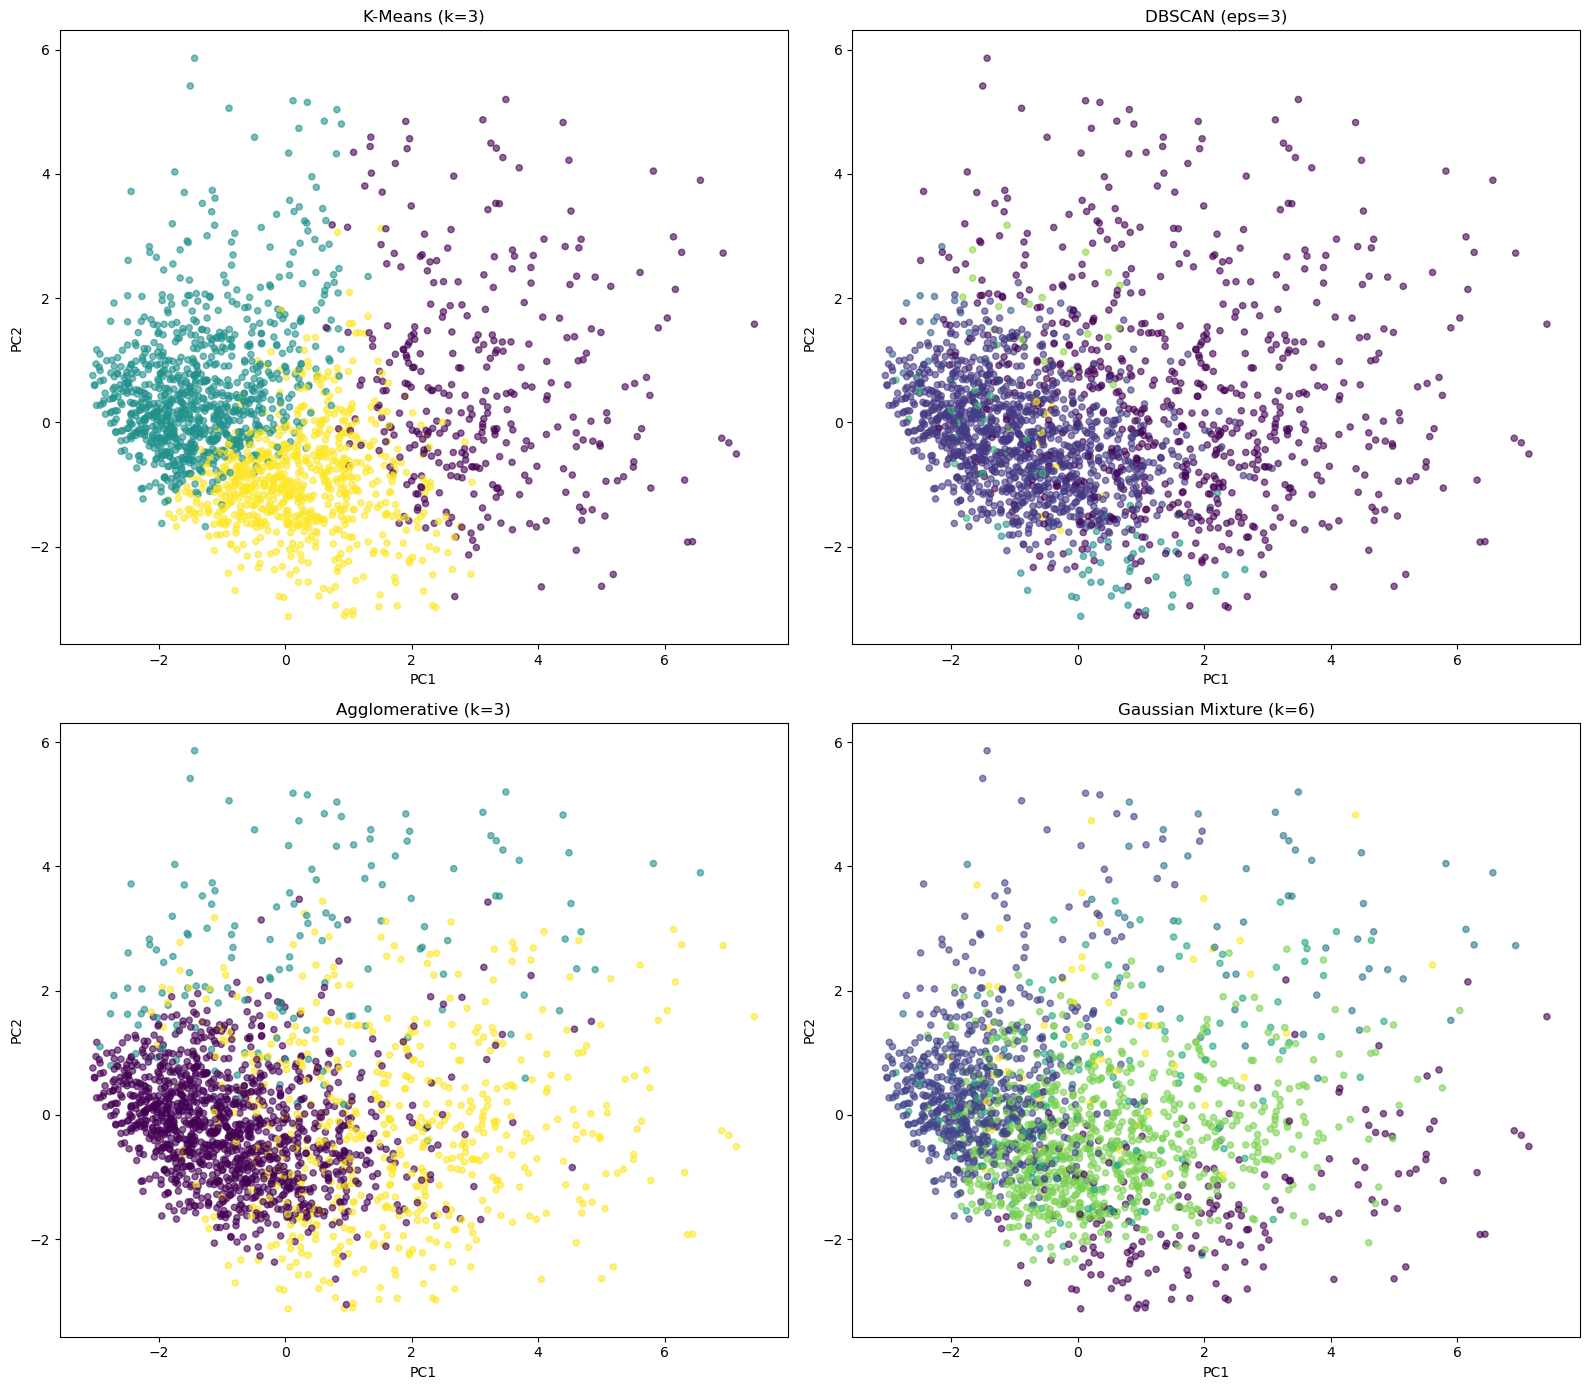

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

axes[0, 0].scatter(PC1, PC2, c=kmeans_labels, cmap='viridis', alpha=0.6, s=20)
axes[0, 0].set_title(f'K-Means (k={optimal_k})')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')

axes[0, 1].scatter(PC1, PC2, c=dbscan_labels, cmap='viridis', alpha=0.6, s=20)
axes[0, 1].set_title(f'DBSCAN (eps={selected_eps})')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')

axes[1, 0].scatter(PC1, PC2, c=agg_labels, cmap='viridis', alpha=0.6, s=20)
axes[1, 0].set_title(f'Agglomerative (k={optimal_agg_k})')
axes[1, 0].set_xlabel('PC1')
axes[1, 0].set_ylabel('PC2')

axes[1, 1].scatter(PC1, PC2, c=gmm_labels, cmap='viridis', alpha=0.6, s=20)
axes[1, 1].set_title(f'Gaussian Mixture (k={optimal_gmm_k})')
axes[1, 1].set_xlabel('PC1')
axes[1, 1].set_ylabel('PC2')

plt.tight_layout()
plt.show()

#### Discussion:
We selected `k=3` for 2 models (K-Means and Agglomerative), and `k=6` for other 2 models (DBSCAN and Gaussian Mixture).
Looking at the plots, we cannot say that clusters cleanly separate diabetic from non-diabetic patients.
However, clusters may represent risk profiles. The goal is to organize the data into clusters such that data points within each cluster are more similar to each other than to those in other clusters.

Moreover, clustering itself (the models) doesn't use labels even if the dataset has them, due to the fact that they are unsupervised (i.e. they ignore the target variale). Therefore, the purpose is to discover the natural structure in the data without looking at the label. For example, if one cluster contains more diabetics that can raise the observation that it is strongly associated with diabetes. It also reveals subgroups, patient profiles and combinations of risk factors that logistic regression or svm might not highlight. For example, we can see more groups in two of our clustering methods where we took `k=6` and this alone or increasing can show us subgroups.

#### Function to evaluate clustering against ground truth using NMI and ARI.

In [ ]:
def evaluate_clustering(labels, y_true, method_name="Method"):
    """
    Function for clustering evaluation.

    Args:
        labels: predicted cluster labels
        y_true: True class labels
        method_name: str

    Returns:
        dict with NMI and ARI
    """
    nmi = normalized_mutual_info_score(y_true, labels)
    ari = adjusted_rand_score(y_true, labels)

    return {
        "Method": method_name,
        "NMI": round(nmi, 4),
        "ARI": round(ari, 4)
    }

In [ ]:
results = []
results.append(evaluate_clustering(kmeans_labels, y_train_sample, "K-Means"))
results.append(evaluate_clustering(dbscan_labels, y_train_sample, "DBSCAN"))
results.append(evaluate_clustering(agg_labels, y_train_sample, "Agglomerative"))
results.append(evaluate_clustering(gmm_labels, y_train_sample, "Gaussian Mixture"))

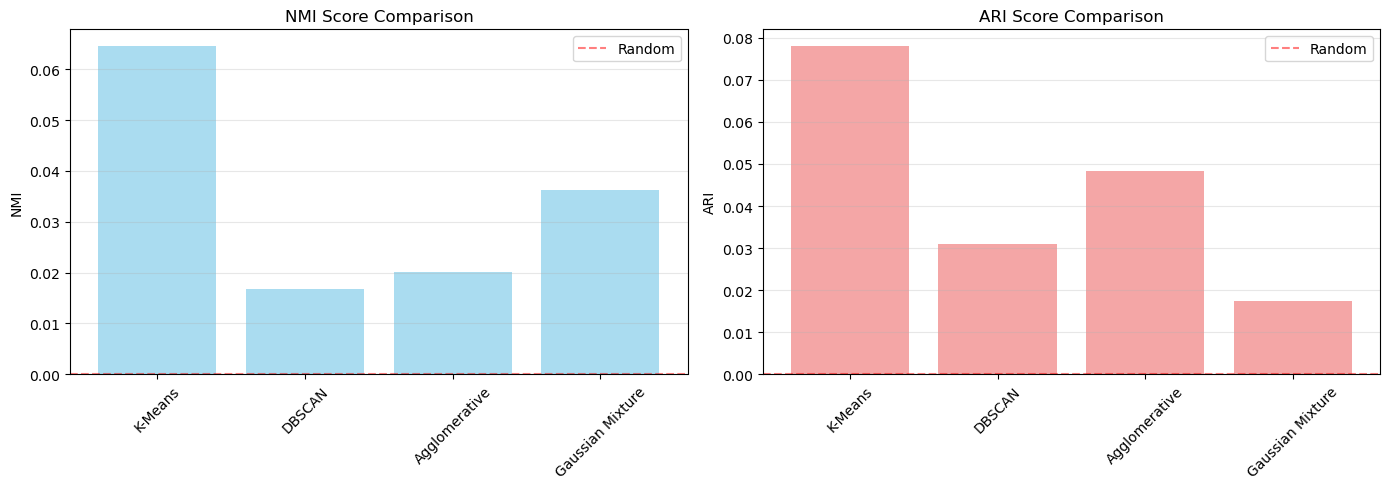

In [ ]:
results_df = pd.DataFrame(results)

# Bar plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
metrics = ['NMI', 'ARI']
colors = ['skyblue', 'lightcoral']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    axes[idx].bar(results_df['Method'], results_df[metric], color=color, alpha=0.7)
    axes[idx].set_ylabel(metric)
    axes[idx].set_title(f'{metric} Score Comparison')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Random')
    axes[idx].legend()

plt.tight_layout()
plt.show()

Both `NMI` and `ARI` scores are low (below `0.08`) for all clustering methods, so the data is not clusterable with respect the true classes.

#### Preprocessing pipeline

In [ ]:
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), X_train.columns)
])

#### Random Forest (Default)

In [ ]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=3,
                       scoring='roc_auc', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
print(f"Best params: {rf_grid.best_params_}")

y_pred_rf = rf_grid.predict(X_test)
y_pred_proba_rf = rf_grid.predict_proba(X_test)[:, 1]

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


#### Random Forest (Balanced)

In [ ]:
rf_balanced_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

rf_balanced_grid = GridSearchCV(rf_balanced_pipeline, param_grid=rf_param_grid,
                                cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_balanced_grid.fit(X_train, y_train)
print(f"Best params: {rf_balanced_grid.best_params_}")

y_pred_rf_bal = rf_balanced_grid.predict(X_test)
y_pred_proba_rf_bal = rf_balanced_grid.predict_proba(X_test)[:, 1]

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


#### Logistic Regression

In [ ]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42))
])

lr_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],
    'classifier__class_weight': [None, 'balanced']
}

lr_grid = GridSearchCV(lr_pipeline, param_grid=lr_param_grid, cv=3,
                       scoring='roc_auc', n_jobs=-1, verbose=1)
lr_grid.fit(X_train, y_train)
print(f"Best params: {lr_grid.best_params_}")

y_pred_lr = lr_grid.predict(X_test)
y_pred_proba_lr = lr_grid.predict_proba(X_test)[:, 1]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params: {'classifier__C': 0.001, 'classifier__class_weight': 'balanced'}


#### Evaluation

In [ ]:
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """
    Function to evaluate above models.

    Args:
        y_true
        y_pred
        y_pred_proba
        model_name

    Returns:
        dict with Accuracy, Precision, Recall,
        F1-Score, and AUC scores.
    """
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_pred_proba)
    }

    return {'model': model_name, **metrics}

In [ ]:
# Evaluate all models

results = []
results.append(evaluate_model(y_test, y_pred_rf, y_pred_proba_rf, "RF (Default)"))
results.append(evaluate_model(y_test, y_pred_rf_bal, y_pred_proba_rf_bal, "RF (Balanced)"))
results.append(evaluate_model(y_test, y_pred_lr, y_pred_proba_lr, "Logistic Regression"))

In [ ]:
# Results table

results_df = pd.DataFrame(results)
results_df

model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0         RF (Default)  0.864731   0.598659  0.088414  0.154074  0.821837
1        RF (Balanced)  0.731887   0.311917  0.766445  0.443390  0.822399
2  Logistic Regression  0.731414   0.310616  0.760787  0.441127  0.819660

#### Takeaway:
Balanced weights improved recall (from 0.09 to 0.77) at the cost of lower precision. For healthcare applications, catching more diabetic patients (high recall) is often more important than avoiding false alarms. So, balanced weight is preferable here compared to the default random forest. All three models achieve similar AUC (`0.82`).

### Data for part 2 (image classification using CNN):
* URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset


In [ ]:
train_dir = 'Vegetable Images/train'
test_dir = 'Vegetable Images/test'
valid_dir = 'Vegetable Images/validation'

In [ ]:
# !pip install tensorflow==2.17.1

#### Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import time

#### Load datasets without preprocessing yet

In [ ]:
training_dataset = tf.keras.utils.image_dataset_from_directory(train_dir)
validation_dataset = tf.keras.utils.image_dataset_from_directory(valid_dir)
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [ ]:
for images, labels in training_dataset.take(1):
    print(f"Batch shape: {images.shape}")

Batch shape: (32, 256, 256, 3)


2025-11-25 22:48:05.970225: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


There are 32 images per batch. The size of each images is 256 by 256. There are 3 channels in each dimension.

In [ ]:
index = 0
for image, label in training_dataset.take(9):
  print("Image #: " + str(index))
  print(image.shape)
  print(label.shape)
  index +=1

Image #: 0
(32, 256, 256, 3)
(32,)
Image #: 1
(32, 256, 256, 3)
(32,)
Image #: 2
(32, 256, 256, 3)
(32,)
Image #: 3
(32, 256, 256, 3)
(32,)
Image #: 4
(32, 256, 256, 3)
(32,)
Image #: 5
(32, 256, 256, 3)
(32,)
Image #: 6
(32, 256, 256, 3)
(32,)
Image #: 7
(32, 256, 256, 3)
(32,)
Image #: 8
(32, 256, 256, 3)
(32,)


2025-11-25 22:48:10.187033: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
def show_data_structure(path):
    """
    Function to examine class names in train/validate/test datasets.
    """
    for class_name in sorted(os.listdir(path)):
        count = len(os.listdir(os.path.join(path, class_name)))
        print(f"{class_name:}: {count}")

show_data_structure("Vegetable Images/train")
show_data_structure("Vegetable Images/validation")
show_data_structure("Vegetable Images/test")

Bean: 1000
Bitter_Gourd: 1000
Bottle_Gourd: 1000
Brinjal: 1000
Broccoli: 1000
Cabbage: 1000
Capsicum: 1000
Carrot: 1000
Cauliflower: 1000
Cucumber: 1000
Papaya: 1000
Potato: 1000
Pumpkin: 1000
Radish: 1000
Tomato: 1000
Bean: 200
Bitter_Gourd: 200
Bottle_Gourd: 200
Brinjal: 200
Broccoli: 200
Cabbage: 200
Capsicum: 200
Carrot: 200
Cauliflower: 200
Cucumber: 200
Papaya: 200
Potato: 200
Pumpkin: 200
Radish: 200
Tomato: 200
Bean: 200
Bitter_Gourd: 200
Bottle_Gourd: 200
Brinjal: 200
Broccoli: 200
Cabbage: 200
Capsicum: 200
Carrot: 200
Cauliflower: 200
Cucumber: 200
Papaya: 200
Potato: 200
Pumpkin: 200
Radish: 200
Tomato: 200


#### The dataset's structure is as follows:

The root folder is named "vegetable images" and it contains 3 subfolders, which are, "test", "validation", and "training.
Each subfolder has the following folders, which represent the classes: `Bean` `Bitter_Gourd` `Bottle_Gourd` `Brinjal` `Broccoli` `Cabbage` `Capsicum` `Carrot` `Cailiflower` `Cucumber` `Papaya` `Potato` `Pumpkin` `Radish` `Tomato`. There are `1000` examples in train data and `200` in both validation and test data.

#### Visualize one sample image from each class in train set.

In [ ]:
# Adjust labels to int
training_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='int'
)

class_names = training_dataset.class_names

Found 15000 files belonging to 15 classes.


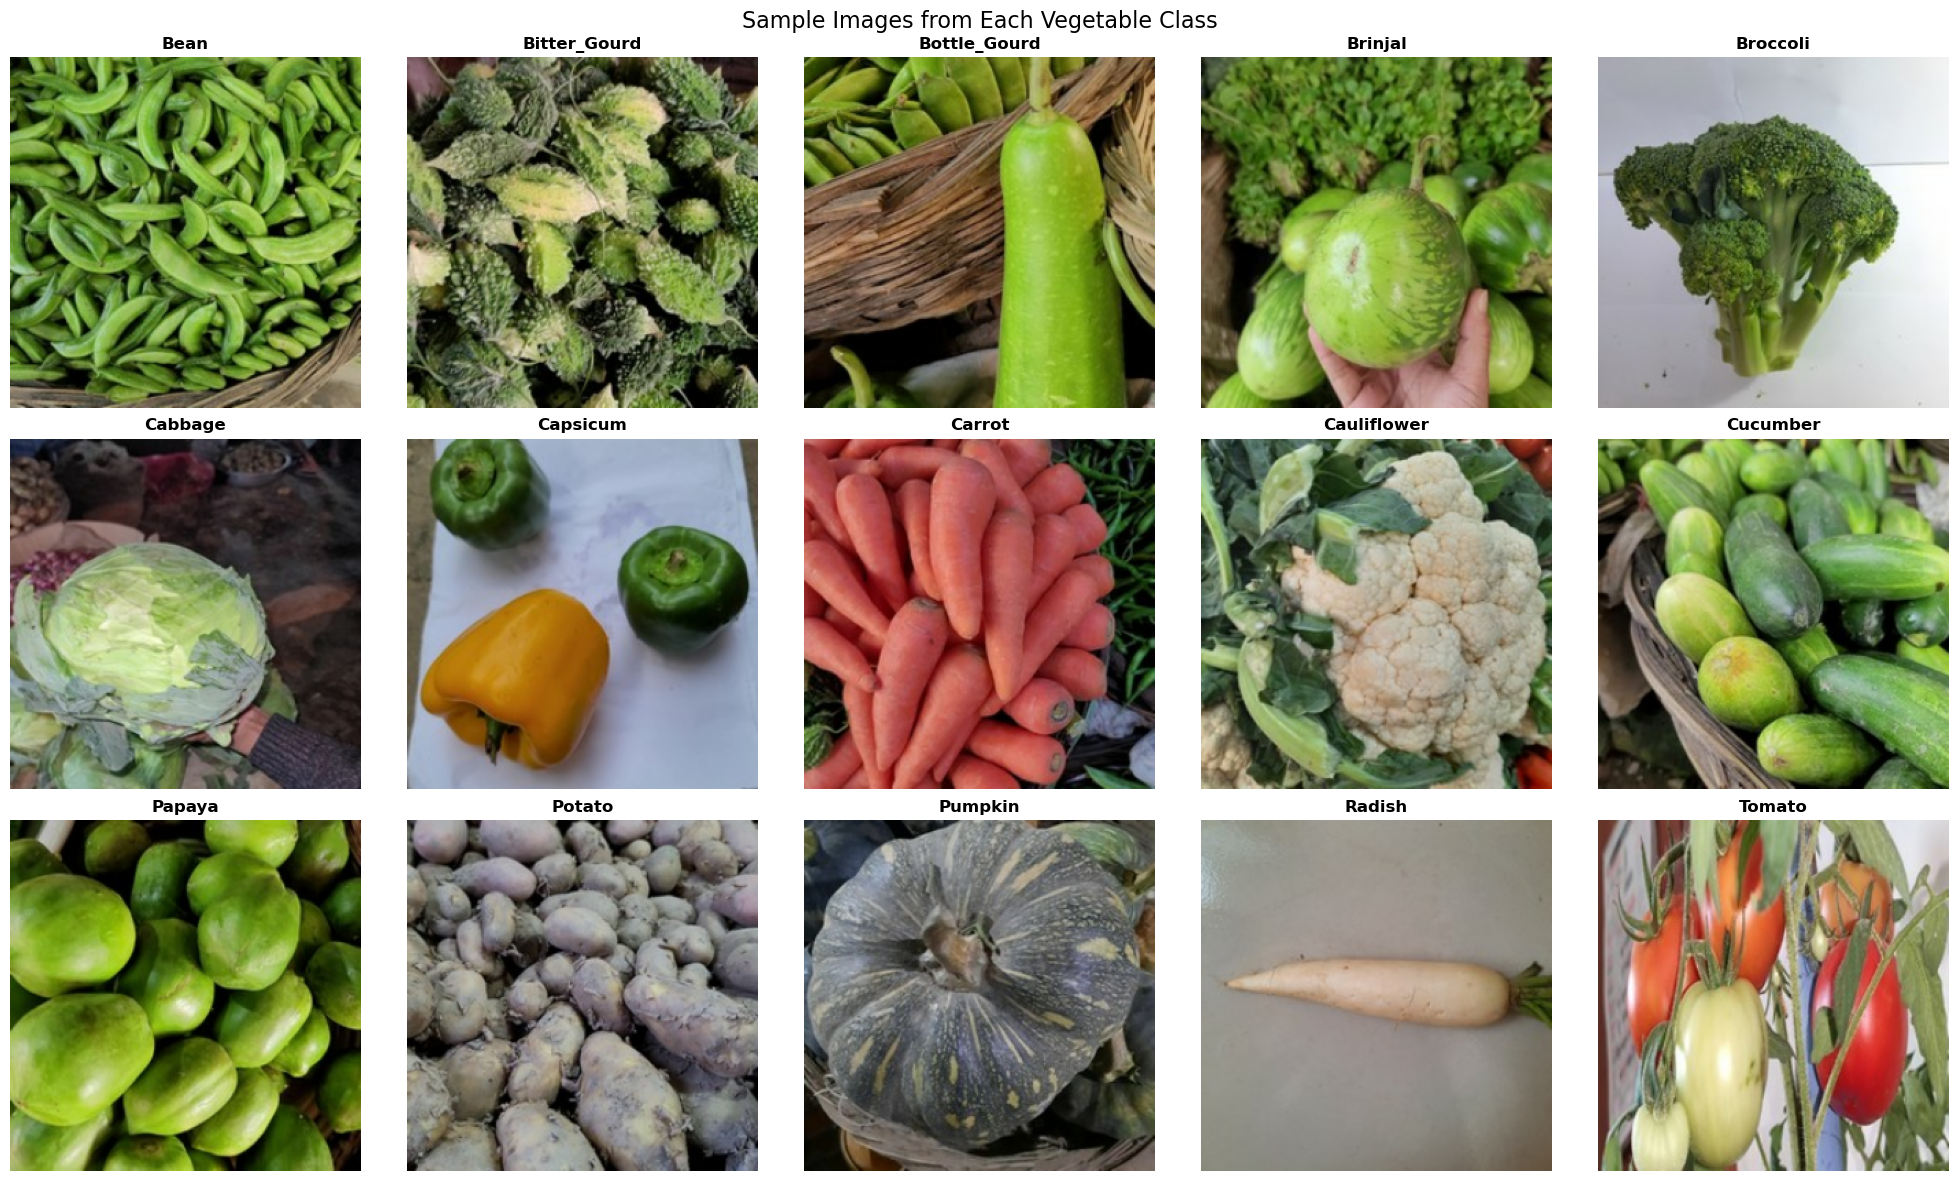

In [ ]:
# Collect one sample per class
samples_per_class = {name: None for name in class_names}

for images, labels in training_dataset:
    for img, label in zip(images, labels):
        class_name = class_names[label.numpy()]
        if samples_per_class[class_name] is None:
            samples_per_class[class_name] = img.numpy()

        # Break if we have all classes
        if all(v is not None for v in samples_per_class.values()):
            break
    if all(v is not None for v in samples_per_class.values()):
        break

# Plot
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

for idx, (class_name, image) in enumerate(samples_per_class.items()):
    if image is not None:
        display_img = image / 255.0
        axes[idx].imshow(display_img)
        axes[idx].set_title(class_name, fontsize=12, fontweight='bold')
        axes[idx].axis('off')

plt.suptitle('Sample Images from Each Vegetable Class', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

#### CNN model

In [ ]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation= 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=len(class_names), activation='softmax'),

])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.build()

In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    33,554,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,592,399 (128.14 MB)

 Trainable params: 33,592,399 (128.14 MB)

 Non-trainable params: 0 (0.00 B)

We built a CNN with two Conv + MaxPool blocks (32 and 64 filters, 3 x 3 kernels, and same padding).
Then we flattened from Dense(128) to Dropout(0.25), then Dense(128), and finally Dense(N, softmax) on 256 × 256 × 3 inputs.
The above table shows that the trainable parameters are about 33.6 M (896 + 18,496 + 33,554,560 + 16,512 + 129 × 15).

In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(training_dataset, validation_data = validation_dataset, epochs=3)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 242s 515ms/step - accuracy: 0.3764 - loss: 15.7345 - val_accuracy: 0.5823 - val_loss: 1.3880
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 252s 538ms/step - accuracy: 0.6742 - loss: 1.0786 - val_accuracy: 0.5933 - val_loss: 1.4103
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 251s 536ms/step - accuracy: 0.7918 - loss: 0.7260 - val_accuracy: 0.5950 - val_loss: 1.6422


In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(test_dataset, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - accuracy: 0.5893 - loss: 1.6273

Test Loss: 1.6273
Test Accuracy: 58.93%


We ran the model for 3 epochs and it took about 10 minutes in total, each epoch took 3.4 minutes.
Training accuracy increased from 37.6% to 79.2%, but validation accuracy stayed around 59% and validation loss started increasing after epoch 1. This could indicate overfitting.

On the test data, the accuracy was 58.93% with the loss of 1.6. This is close to what we saw with validation data.

Since the performace on validation data stayed around 59% in those 3 epochs, we think training more epochs will not make the model perform better.

In future, we could probably fine tune CNN model with different parameters or work more on data pre-preprocessing.